# Distribuições

Os conjuntos de dados podem estar apresentados de várias formas. Isso são as distribuições dos dados.

## Distribuição Binomial

Quando existem apenas dois resultados, mutualmente exclusivos e as n tentativas são *independentes*. Como no caso do *Survived* do Titanic.

In [1]:
import pandas
titanic = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/titanic_2.csv")

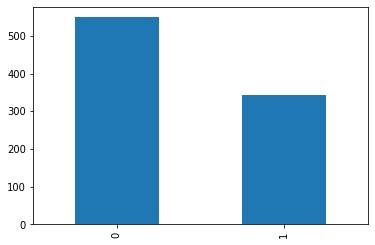

In [2]:
titanic["Survived"].value_counts().plot.bar()

Conseguimos a mesma distribuição se pensarmos no problema de jogar uma moeda. Ou pode dar cara ou coroa

### Em estatística tudo começa com PROBABILIDADE

Probabilidade é o estudo das chances de obtenção de cada resultado de um experimento aleatório.

## É de conhecimento geral que se jorgarmos uma moeda 50x ela vai cair 25x cara!
Como podemos provar isso?

![coin](https://databootcamp.nyc3.digitaloceanspaces.com/img/bbbba6fffd901a174cbaa8fe34d093b0.gif)

In [6]:
import numpy

In [7]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

numpy.random.randint(minimo_inclusivo,
                     maximo_exclusivo,
                     total_de_resultados)

#esse cara retorna uma lista de Eventos com 50 valores 0 (coroa) e 1 (cara)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0])

Um experimento aleatório pode ser repetido inúmeras vezes e nas mesmas condições e, mesmo assim, apresenta resultados diferentes. Cada um desses resultados possíveis é chamado de **ponto amostral**.

Por ser uma distribuição binomial podemos calcular o número de jogadas com sucesso (1) apenas somando todos os valores.

In [8]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

resultado = numpy.random.randint(minimo_inclusivo, maximo_exclusivo, total_de_resultados)
sum(resultado)

22

### Também podemos mostrar esse experimento de forma gráfica

Mas para isso precisamos usar outra biblioteca do Python que o Pandas está sempre usando por baixo dos panos. O **Pyplot do Matplotlib**.

<BarContainer object of 1 artists>

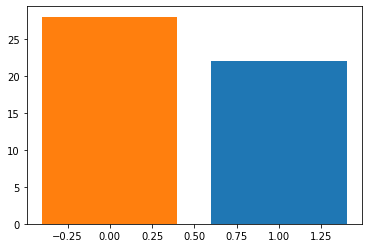

In [9]:
caras = sum(resultado)
coroas = total_de_resultados - caras

from matplotlib import pyplot
pyplot.bar(1, caras)
pyplot.bar(0, coroas)

### Isso que nós acabamos de fazer foi um experimento. Para diminuirmos a aleatoriedade devemos repetir esse experimento mais vezes

Se a moeda é justa, temos a mesma chance de cair cara ou coroa. Ou seja, esperamos que o valor da soma acima seja próximo de 25. Mas, como vimos, nem sempre é 25. 

Aqui, sabemos que era pra ser algo em torno de 25 e fica fácil acreditar que as vezes em que não foi 25 são por causa da aleatoriedade (afinal, nós construímos o código pra ser assim). Mas e na vida real?

Se fizemos o experimento várias vezes, aumentamos a certeza da nossa afirmação.

#### Primeiro vamos separar o código do sorteio em uma função

In [16]:
numpy.random.randint?

In [10]:
def contador_de_caras():
    total_de_resultados = 50
    resultado_das_jogadas = numpy.random.randint(0, 2, total_de_resultados)
    somador = sum(resultado_das_jogadas)
    return somador

In [11]:
contador_de_caras()

27

#### Agora vamos criar uma função que repita esse experimento e coloque o resultado em uma lista

In [12]:
def simulador_jogadas_de_moeda(qtd_de_experimentos):

    qtd_caras = []
    #esse for faz ele repetir o codigo dele o numero de vezes que passamos
    for repeticao in range(qtd_de_experimentos): 
        jogadas = contador_de_caras()
        #pega o resultado da soma e inclui na lista
        qtd_caras.append(jogadas) 
    
    return qtd_caras

In [13]:
simulador = simulador_jogadas_de_moeda(10)

In [14]:
simulador

[28, 23, 19, 33, 19, 28, 23, 25, 27, 22]

### Uma forma fácil de ver esse resultado é olhando os resultados de forma agrupada

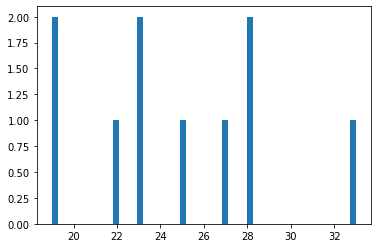

In [15]:
pyplot.hist(simulador, bins=total_de_resultados);

## <font color='blue'>Como podemos aumentar a certeza de que cai mais 25?</font>
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

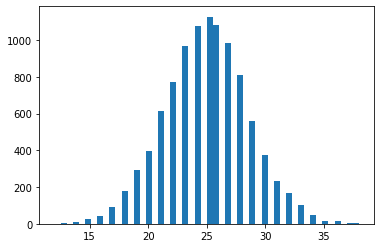

In [39]:
#solução
simulador = simulador_jogadas_de_moeda(10000)
pyplot.hist(simulador, bins=total_de_resultados);

### Podemos usar o KDE (Kernel Density Estimate) para validar se tende a cair no 25

Esse gráfico calcula uma estimativa da sua distribuição. E parece uma **Normal**.

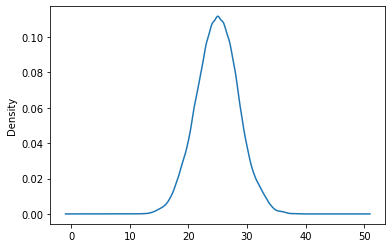

In [40]:
pandas.Series(simulador).plot.kde()

## Distribuição Normal

A distribuição normal tem como caracteristica o formato de sino e se imaginarmos uma reta no meio do gráfico (mediana) os dados estão igualmente distribuídos (simetrico ao centro).

Nós vemos amostras nessa distribuíção em diversos casos: altura das pessoas, aferição de pressão sanguínea, salarios, resultados de testes de QI, etc..

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/normal-distrubution-large.svg)

### Distribuição normal em vídeo (Modelo de probabilidade do Museum of Science de Boston)

In [ ]:
from IPython.display import IFrame

# Youtube
IFrame("https://www.youtube.com/embed/wUgQtXEodf0?rel=0&amp;controls=0&amp;showinfo=0", width="560", height="315", frameborder="0", allowfullscreen=True)

## Qual a probabilidade de cair menos de 20x cara no simulador?
#### Primeiro temos que contar quantas vezes caiu menos de 20

Usamos um número grande de jogadas para conseguir uma probabilidade prática próxima da probabilidade teórica

In [41]:
total_jogadas = 9000
simulador = simulador_jogadas_de_moeda(total_jogadas)

In [42]:
menor_20 = 0
for contador_cara in simulador:
    if (contador_cara < 20):
        menor_20 = menor_20 + 1 # == menor_20 += 1
menor_20

510

Vamos verificar em porcentagem qual a probabilidade

In [43]:
regra_de_tres = (100 * menor_20/total_jogadas)
print(f"A probabilidade de cair um número menor que 20 é de {regra_de_tres}%")

A probabilidade de cair um número menor que 20 é de 5.666666666666667%


### Lembra das métricas? Elas são bem descritas nas distribuições normais

**Quanto menor é a variância, mais próximos os valores estão da média.**

![variancia](https://databootcamp.nyc3.digitaloceanspaces.com/img/bell_curve_normal-curve.gif)
![desvpad](https://databootcamp.nyc3.digitaloceanspaces.com/img/standard-deviation-examples1.png)

Ou seja, quanto mais distantes da média são os valores em uma normal, menor a chance deles acontecerem.

Lembram que falamos que um boxplot é como um histograma "visto de cima"? Conseguem imaginar como seria o boxplot dessa distribução?

## Com essas informações (Média, Mediana e Moda) vemos a Assimetria de uma Normal

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/mode3.png)

Se **Média < Mediana < Moda**, tem a calda tendendo a esquerda (negativa)

Se **Média == Mediana == Moda**, então a distribuição é aproximadamente simétrica (ou também conhecida como normal)

Se **Média > Mediana > Moda**, tem a calda tendendo a direita (positiva)

O boxplot nos ajuda a ter uma ideia visual dessa comparação, antes mesmo de testarmos a simetria da distribuição.

## <font color='blue'>Faça uma função que retorne a assimetria de qualquer coluna (Serie)</font>
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [69]:
#solução
def assimetria(serie):
    moda = serie.mode()[0]
    media = serie.mean()
    mediana = serie.mean()
    
    if (moda == mediana == media):
        result = "Simétrica"
    elif (media < mediana  < moda):
        result = "Negativa"
    else:
        result = "Possitiva"
    
    return result

assimetria(titanic.Age)

'Possitiva'

Podemos validar o resultado olhando os dados da coluna no Titanic

In [70]:
moda = titanic.Age.mode()
media = titanic.Age.mean()
mediana = titanic.Age.median()

print("moda:", moda[0]) 
print("mediana:", mediana)
print("media:", media)

moda: 24.0
mediana: 28.0
media: 29.69911764705882


### Como verificar se uma distribuição é normal?

Esta função testa a hipótese nula de que uma amostra vem
de uma distribuição normal. É baseado em Teste de D'Agostino e Pearson 
que combina inclinação e curtose a produzir um teste global de normalidade.

Para fazer a verificação podemos usar o método do próprio pacote **Scipy**.

In [71]:
from scipy import stats
stats.normaltest?

Essa função é um **teste estatístico** que nos retorna um **pvalue** que vamos ver em breve o que significa.

In [72]:
amostra = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]
z, pvalue = stats.normaltest(amostra)
if(pvalue >= 0.05):
    print("Distribuição é Normal", pvalue)
else:
    print("Não é uma distribuição normal", pvalue)

Distribuição é Normal 0.3734176866124704


## <font color='blue'>Faça uma função que verifique se uma Série é uma normal</font>
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [75]:
#solução
def verificador_de_normal(series):
    z, pvalue = stats.normaltest(series)
    if(pvalue >= 0.05):
        print("Distribuição é Normal", pvalue)
    else:
        print("Não é uma distribuição normal", pvalue)

In [76]:
verificador_de_normal(titanic.Age.dropna())

Não é uma distribuição normal 0.00011709599657350757


### Mas eu queria tanto que ele fosse uma normal :(

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/paranormal.jpg)

## Temos uma mágica! Teorema do Limite Central
Esse teorema prova que um conjunto das médias de uma amostra independente que veio de uma população qualquer segue a distribuição normal (mesmo que a população que originou a amostra não seja normal!)

![abracadabra](https://media.giphy.com/media/l2YWs1NexTst9YmFG/giphy.gif)

### O pandas nos entrega uma função de amostra (sample) nela podemos passar a fração da distribuição

In [77]:
titanic.Age.sample(frac=0.1)

137    37.0
445     4.0
793     NaN
597    49.0
399    28.0
       ... 
178    30.0
140     NaN
175    18.0
813     6.0
470     NaN
Name: Age, Length: 89, dtype: float64

Olhem como **Age** é diferente de um conjunto das médias das amostras 

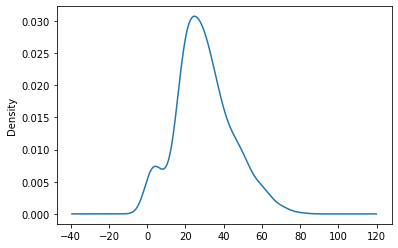

In [78]:
titanic.Age.plot.kde()

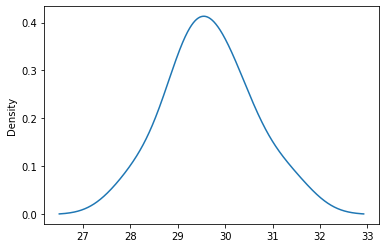

In [87]:
medias = []
for i in range(10):
    media = titanic.Age.sample(frac=0.3).mean()
    medias.append(media)
pandas.Series(medias).plot.kde()

## <font color='blue'>Agora que vocês sabem a fórmula, que tal tentar fazer com que a coluna Age vire normal.</font>

### Dica: Um conjunto das médias de uma amostra do seu dado original gera uma distribuição normal
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [90]:
#solução
medias = []
for i in range(10000):
    media = titanic.Age.sample(frac=0.3).mean()
    medias.append(media)

verificador_de_normal(medias)

Distribuição é Normal 0.3040962206987094


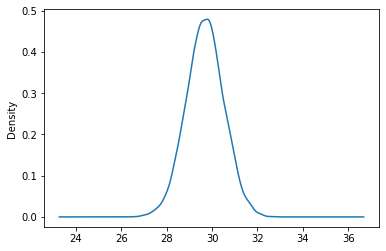

In [94]:
pandas.Series(medias).plot.kde()

### Mais magias da Normal
Além de ser a distribuição que mais aparece na natureza, a Normal tem muitas propriedades legais: uma delas é que muitas outras distribuições podem virar normais facilmente, através de pequenas transformações.

Isso permite que a gente consiga fazer coisas incríveis com estatística simples!

**Lembra do lançamento de moedas?**
Lançar uma moeda segue uma distribuição bernoulli (sim ou não).

In [98]:
from scipy.stats import bernoulli

bernoulli_exemplo = bernoulli.rvs(p = 0.5) # probabilidade é 50%

In [99]:
# Fizemos um único lançamento de uma moeda honesta
bernoulli_exemplo

1

Podemos fazer vários experimentos Bernoulli, tipo 50 lançamentos de moeda.

In [100]:
bernoulli_experimento = bernoulli.rvs(p = 0.5, size = 50)
bernoulli_experimento

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1])

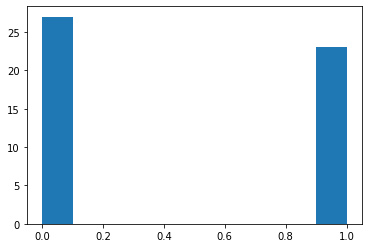

In [101]:
pyplot.hist(bernoulli_experimento);

A soma de vários lançamentos de moeda dessa (várias Bernoulli) gera uma distribuição Binomial.

In [102]:
from scipy.stats import binom

# é basicamente o nosso contador de caras
binomial_exemplo = binom.rvs(n = 50, # 50 lançamentos
                             p = 0.5)

In [103]:
binomial_exemplo

26

Também podemos fazer 10000 experimentos de 50 lançamentos de moedas...

In [105]:
binomial_experimento = binom.rvs(n = 50,
                                 p = 0.5,
                                 size = 10000)

In [106]:
binomial_experimento

array([29, 27, 20, ..., 21, 25, 29])

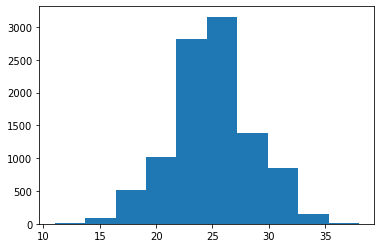

In [107]:
pyplot.hist(binomial_experimento);

Já sabemos que isso vai acabar parecendo com uma normal, né?
Por outro lado, dá pra transformar uma binomial em uma normal com alguma facilidade através de uma transformação bem conhecida. Então fomos de um universo binário (cara ou coroa) para uma distribuição mágica!

E a magia não para por aí...

### Distribuição exponencial

A distribuição exponencial é uma distribuição muito utilizada na prática para modelar tempo de falha de objetos. Por exemplo, pode ser usada para modelar o tempo que demora até uma lâmpada falhar. Ela possui um parâmetro, que pode ser interpretado da seguinte forma: é o tempo de vida médio do objeto.
Ela sofre de perda de memória!

Exemplo:

Tempo de ligação em um callcenter: 
Quanto tempo 100 pessoas ficaram em uma ligação com um callcenter ?

<BarContainer object of 17 artists>

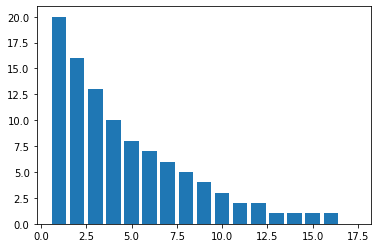

In [108]:
qnt_pessoas = [20,16,13,10,8,7,6,5,4,3,2,2,1,1,1,1,0]
tempo_de_ligacao = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

pyplot.bar(tempo_de_ligacao, qnt_pessoas)

## <font color='blue'>No Titanic, vocês conseguem achar alguma coluna que siga essa distribuição?</font>

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [109]:
#solução
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaSexMean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0


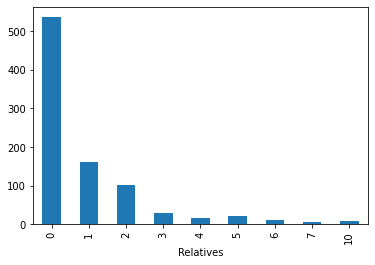

In [132]:
titanic.groupby("Relatives")["PassengerId"].count().plot.bar()

E adivinha? A distribuição normal é parte de uma família maravilhosa de distribuições chamada _família exponencial_. Essas distribuições todas tem pequenas transformações para mudá-las de um formato para o outro.

Isso é super útil para fazer testes de hipóteses!

# Distribuições são lindas <3
![dinossauros](https://people.csail.mit.edu/tbroderick/img/dino_release.png)